In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_excel('side_effect_data 1.xlsx')

In [3]:
df.head()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

In [5]:
print(df.describe())

       Kullanici_id                   Dogum_Tarihi  \
count   2357.000000                           2357   
mean      97.216801  1974-11-25 04:06:12.677131936   
min        1.000000            1939-10-12 00:00:00   
25%       47.000000            1959-02-05 00:00:00   
50%       97.000000            1973-09-09 00:00:00   
75%      146.000000            1992-03-24 00:00:00   
max      196.000000            2011-04-25 00:00:00   
std       57.017200                            NaN   

               Ilac_Baslangic_Tarihi              Ilac_Bitis_Tarihi  \
count                           2357                           2357   
mean   2022-01-07 10:47:36.173101312  2022-03-10 16:25:27.365294848   
min              2022-01-01 00:00:00            2022-03-02 00:00:00   
25%              2022-01-04 00:00:00            2022-03-06 00:00:00   
50%              2022-01-07 00:00:00            2022-03-11 00:00:00   
75%              2022-01-11 00:00:00            2022-03-15 00:00:00   
max             

In [6]:
print("Descriptive Statistics:\n")
print(df.describe(include='all'))

Descriptive Statistics:

        Kullanici_id Cinsiyet                   Dogum_Tarihi    Uyruk     Il  \
count    2357.000000     1579                           2357     2357   2130   
unique           NaN        2                            NaN        1     13   
top              NaN   Female                            NaN  Turkiye  Adana   
freq             NaN      872                            NaN     2357    220   
mean       97.216801      NaN  1974-11-25 04:06:12.677131936      NaN    NaN   
min         1.000000      NaN            1939-10-12 00:00:00      NaN    NaN   
25%        47.000000      NaN            1959-02-05 00:00:00      NaN    NaN   
50%        97.000000      NaN            1973-09-09 00:00:00      NaN    NaN   
75%       146.000000      NaN            1992-03-24 00:00:00      NaN    NaN   
max       196.000000      NaN            2011-04-25 00:00:00      NaN    NaN   
std        57.017200      NaN                            NaN      NaN    NaN   

              

In [7]:
df.duplicated().sum()

0

In [8]:
missing_count = df.isnull().sum()
print("Missing values per column:\n")
print(missing_count)

Missing values per column:

Kullanici_id                          0
Cinsiyet                            778
Dogum_Tarihi                          0
Uyruk                                 0
Il                                  227
Ilac_Adi                              0
Ilac_Baslangic_Tarihi                 0
Ilac_Bitis_Tarihi                     0
Yan_Etki                              0
Yan_Etki_Bildirim_Tarihi              0
Alerjilerim                         484
Kronik Hastaliklarim                392
Baba Kronik Hastaliklari            156
Anne Kronik Hastaliklari            217
Kiz Kardes Kronik Hastaliklari       97
Erkek Kardes Kronik Hastaliklari    121
Kan Grubu                           347
Kilo                                293
Boy                                 114
dtype: int64


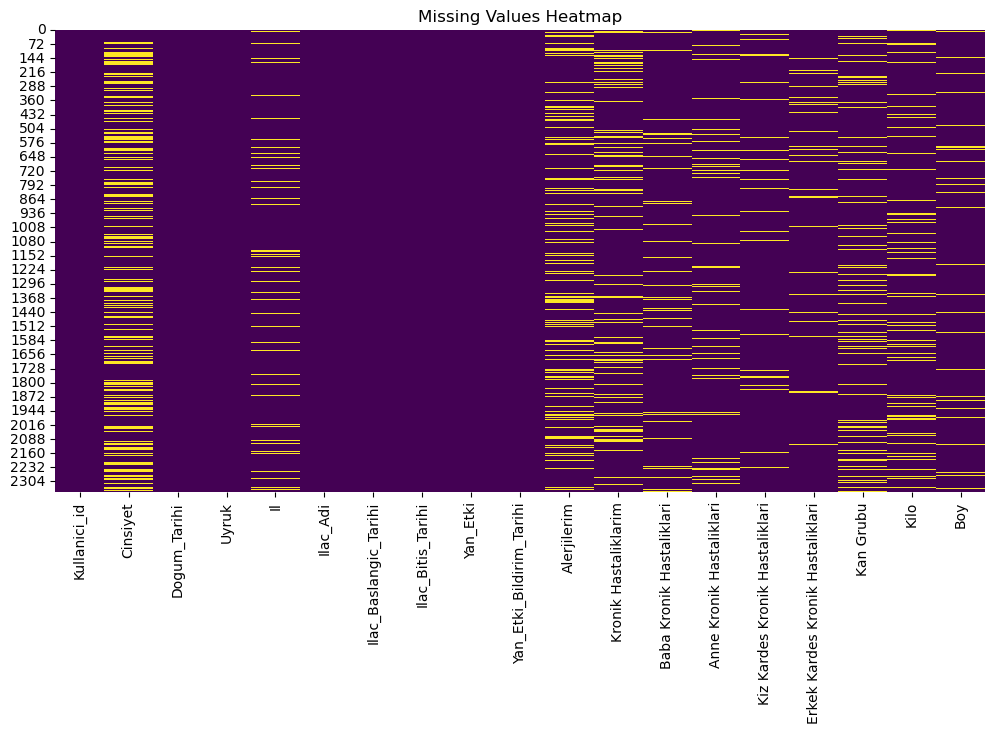

In [9]:
# Missing values by heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

<Figure size 600x300 with 0 Axes>

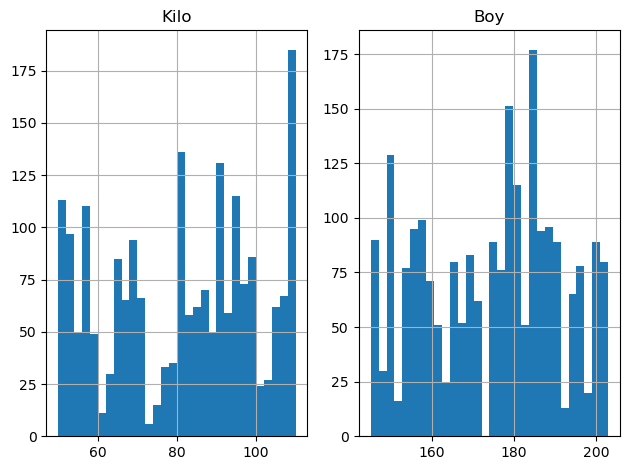

In [10]:
plt.figure(figsize=(6, 3))
df[['Kilo', 'Boy']].hist(bins=30)
plt.tight_layout()
plt.show()

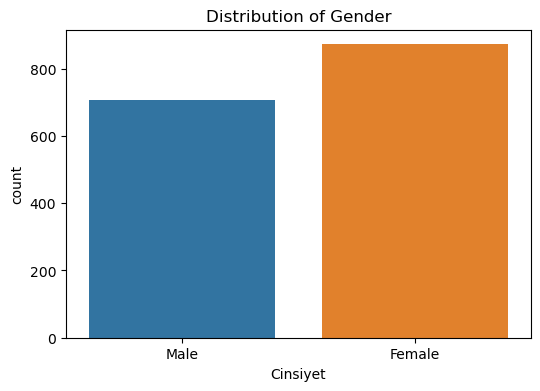

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Cinsiyet', data=df)
plt.title('Distribution of Gender')
plt.show()

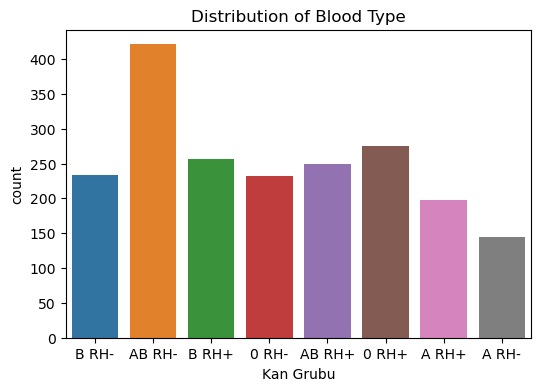

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Kan Grubu', data=df)
plt.title('Distribution of Blood Type')
plt.show()

In [13]:
missing_percentage = (missing_count / len(df)) * 100
print("Percentage of missing values per column: \n")
print(missing_percentage)

Percentage of missing values per column: 

Kullanici_id                         0.000000
Cinsiyet                            33.008061
Dogum_Tarihi                         0.000000
Uyruk                                0.000000
Il                                   9.630887
Ilac_Adi                             0.000000
Ilac_Baslangic_Tarihi                0.000000
Ilac_Bitis_Tarihi                    0.000000
Yan_Etki                             0.000000
Yan_Etki_Bildirim_Tarihi             0.000000
Alerjilerim                         20.534578
Kronik Hastaliklarim                16.631311
Baba Kronik Hastaliklari             6.618583
Anne Kronik Hastaliklari             9.206619
Kiz Kardes Kronik Hastaliklari       4.115401
Erkek Kardes Kronik Hastaliklari     5.133644
Kan Grubu                           14.722104
Kilo                                12.431056
Boy                                  4.836657
dtype: float64


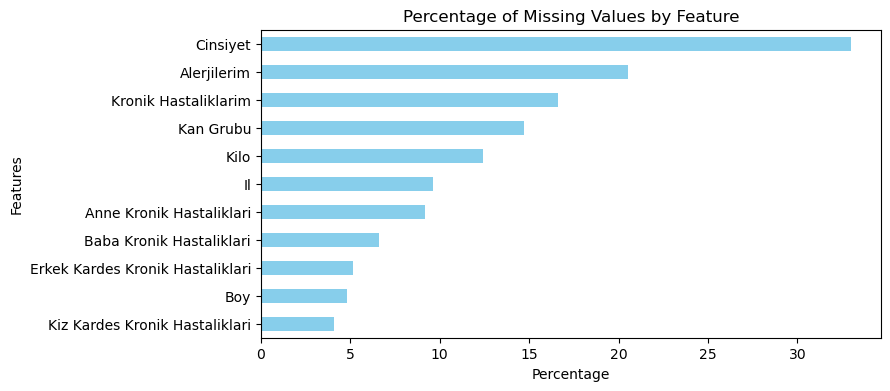

In [14]:
plt.figure(figsize=(8, 4))
missing_percentage[missing_percentage > 0].sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Percentage of Missing Values by Feature')
plt.xlabel('Percentage')
plt.ylabel('Features')
plt.show()

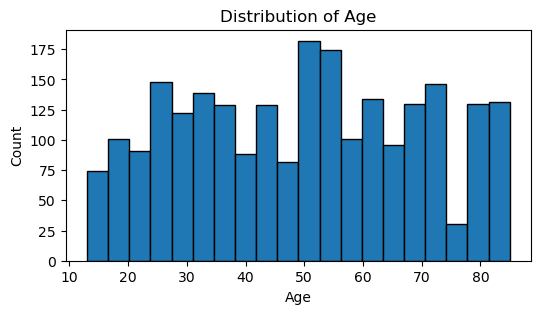

In [15]:
plt.figure(figsize=(6, 3))
df['Age'] = pd.Timestamp.now().year - df['Dogum_Tarihi'].dt.year
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

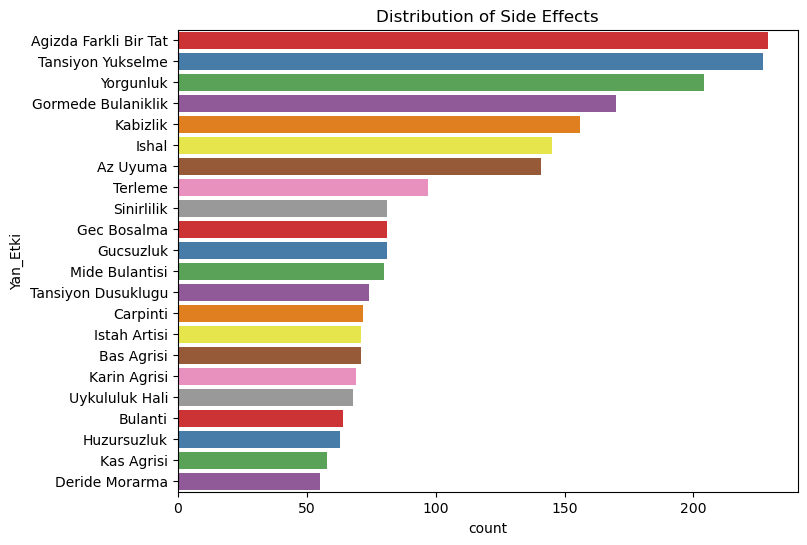

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(y='Yan_Etki', data=df, order=df['Yan_Etki'].value_counts().index, palette='Set1')
plt.title('Distribution of Side Effects')
plt.show()

Handling missing values

In [17]:
df.drop(columns=['Ilac_Adi', 'Uyruk', 'Il', 'Kan Grubu'], inplace=True)

In [18]:
categorical_columns = ['Cinsiyet', 
                       'Alerjilerim', 'Kronik Hastaliklarim', 
                       'Baba Kronik Hastaliklari', 'Anne Kronik Hastaliklari', 
                       'Kiz Kardes Kronik Hastaliklari', 
                       'Erkek Kardes Kronik Hastaliklari']

In [19]:
# Mode for categorical values
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])

In [20]:
# Encode binary categorical variables
le = LabelEncoder()
df['Cinsiyet'] = le.fit_transform(df['Cinsiyet'])

In [21]:
# Multi-label binarization for columns with multiple entries
def multi_label_binarize(df, column_name):
    mlb = MultiLabelBinarizer()
    df[column_name] = df[column_name].str.split(', ')
    binary_columns = mlb.fit_transform(df[column_name])
    
    # Create a DataFrame with unique column names
    binary_df = pd.DataFrame(binary_columns, columns=[f"{column_name}_{cls}" for cls in mlb.classes_], index=df.index)
    
    df = df.join(binary_df)
    df.drop(columns=[column_name], inplace=True)
    return df

In [22]:
# Apply multi-label binarization to relevant columns
df = multi_label_binarize(df, 'Alerjilerim')
df = multi_label_binarize(df, 'Kronik Hastaliklarim')
df = multi_label_binarize(df, 'Baba Kronik Hastaliklari')
df = multi_label_binarize(df, 'Anne Kronik Hastaliklari')
df = multi_label_binarize(df, 'Kiz Kardes Kronik Hastaliklari')
df = multi_label_binarize(df, 'Erkek Kardes Kronik Hastaliklari')

In [23]:
# Date columns to numerical features
date_columns = ['Dogum_Tarihi', 'Ilac_Baslangic_Tarihi', 
                'Ilac_Bitis_Tarihi', 'Yan_Etki_Bildirim_Tarihi']

In [24]:
for col in date_columns:
    df[col + '_Year'] = df[col].dt.year
    df[col + '_Month'] = df[col].dt.month
    df[col + '_Day'] = df[col].dt.day
    df.drop(columns=[col], inplace=True) 

In [25]:
numerical_columns = ['Kilo', 'Boy']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [27]:
# Prepare data for modeling
X = df.drop('Yan_Etki', axis=1, errors='ignore')  # Drop Yan_Etki if still present
y = df['Yan_Etki'] if 'Yan_Etki' in df.columns else None  # Ensure Yan_Etki is present

In [28]:
# Encode categorical variables if needed (e.g., one-hot encoding)
X = pd.get_dummies(X, drop_first=True) 